# Lending Club Case Study

#### import libraries needed for analysis


In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [219]:
# read the provided data set - loan.csv
df = pd.read_csv('loan.csv')

C:\Users\Dell\AppData\Local\Temp\ipykernel_3388\447501429.py:2: DtypeWarning:

Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.



In [220]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [221]:
# check the shape of the data set.
df.shape

(39717, 111)

##### start cleaning the dataset

In [222]:
# drop the columns containing only "NA"
df.dropna(axis=1, how="all")

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [223]:
# drop the columns containing only 0.
df = df.replace(0, np.nan).dropna(axis=1, how='all')

In [224]:
# delete some unnecessary columns
df.drop(["pymnt_plan", "url", "initial_list_status", "application_type", "next_pymnt_d", "policy_code", "funded_amnt_inv",'desc', 'zip_code', 'emp_title' ], axis=1, inplace=True)

In [225]:
# check the shape of the dataframe now.
df.shape

(39717, 42)

In [226]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### standardizing the values: work on datatypes of columns and convert specific column's datatype to numeric if required.

In [227]:
# Correcting data type and format for columns in the dataframe
## Derving more columns with the conversion of data type
df.grade=df.grade.astype('category')
df.sub_grade=df.sub_grade.astype('category')
df.home_ownership=df.home_ownership.astype('category')
df.verification_status=df.verification_status.astype('category')
df.issue_d=pd.to_datetime(df.issue_d,format='%b-%y')
df['issue_year']=pd.to_datetime(df.issue_d,format='%b-%y').dt.year
df['issue_month']=pd.to_datetime(df.issue_d,format='%b-%y').dt.month
df['emp_length'] = df['emp_length'].apply(lambda x: str(x).replace('years', '').replace('year', '').replace('+', '').replace('< 1', '0.5')).astype(float)

In [228]:
df.emp_length.value_counts()

10.0    8879
0.5     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [229]:
df.term = df.term.apply(lambda x: x[:3])

In [230]:
df.term.dtype

dtype('O')

In [231]:
df.term = df.term.apply(lambda x: pd.to_numeric(x))

In [232]:
df.term.dtype

dtype('int64')

In [233]:
## remove % from int_rate and convert it to numeric.
df.int_rate = df.int_rate.apply(lambda x: x[:-1])

In [234]:
df.int_rate = df.int_rate.apply(lambda x: pd.to_numeric(x))

In [235]:
df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [236]:
df = df.drop("funded_amnt", axis=1)

In [237]:
# convert installment datatype to int.
df.installment.head()

0    162.87
1     59.83
2     84.33
3    339.31
4     67.79
Name: installment, dtype: float64

In [238]:
df.installment.astype(int)

0        162
1         59
2         84
3        339
4         67
        ... 
39712     78
39713    275
39714    156
39715    155
39716    255
Name: installment, Length: 39717, dtype: int32

In [239]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month'],
      dtype='object')

In [240]:
# select only the columns which add value to the analysis.
df = df[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]

In [241]:
df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status', 'annual_inc',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'issue_year', 'issue_month'],
      dtype='object')

In [242]:
df.shape

(39717, 17)

In [243]:
# remove all the customers having loan status as "Current" as they are not required for the analysis.
df = df[df.loan_status != "Current"]
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [244]:
df.shape

(38577, 17)

In [245]:
# removing outliers 

<Axes: >

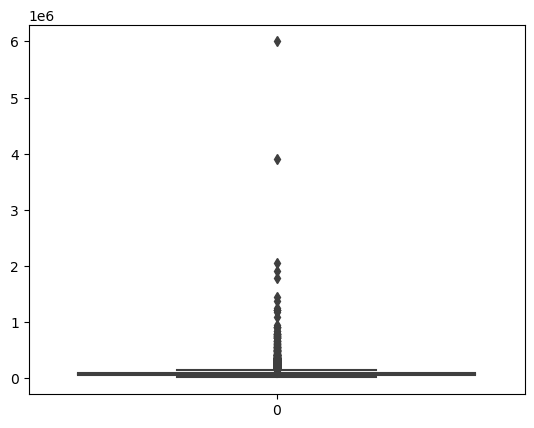

In [246]:
# annual income 
sns.boxplot(df['annual_inc'])

In [247]:
quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [248]:
per_95_annual_inc = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= per_95_annual_inc]

In [249]:
df.shape

(36654, 17)

<Axes: >

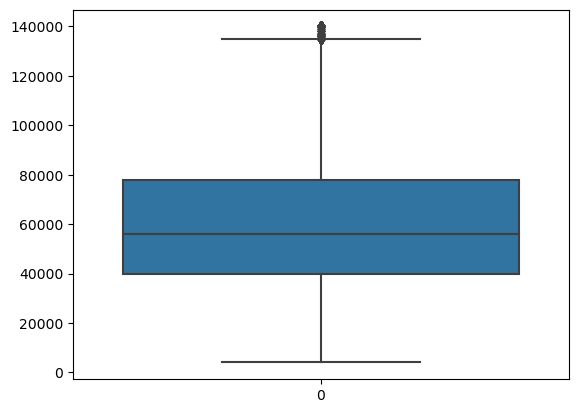

In [250]:
# after removing the outliers annual inc plot looks like this.
sns.boxplot(df.annual_inc)

<Axes: >

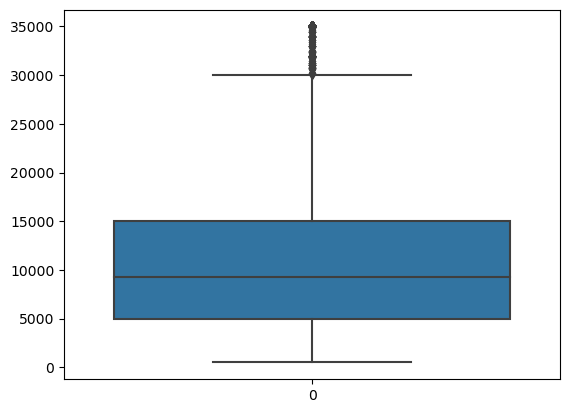

In [251]:
# loan amount
sns.boxplot(df.loan_amnt)

<Axes: >

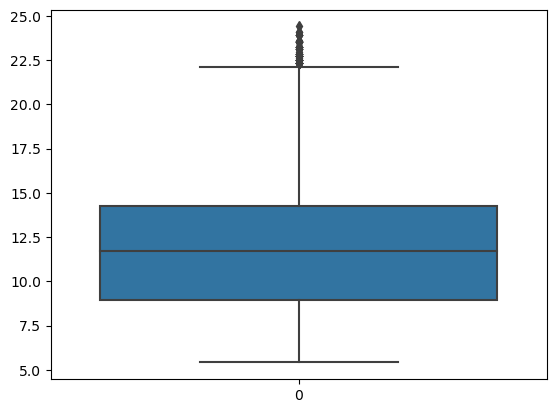

In [252]:
# interest rate
sns.boxplot(df.int_rate)

<Axes: >

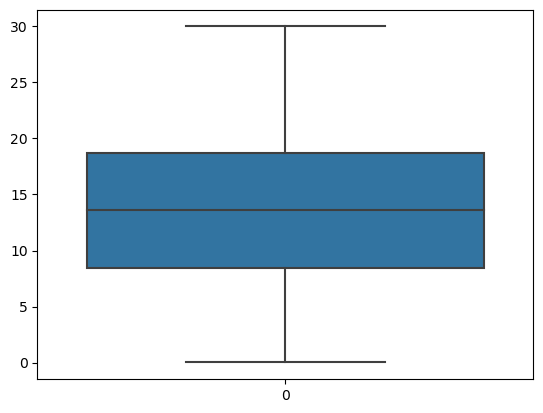

In [253]:
# dti
sns.boxplot(df.dti)

## Univariate Analysis

<Axes: xlabel='loan_status', ylabel='count'>

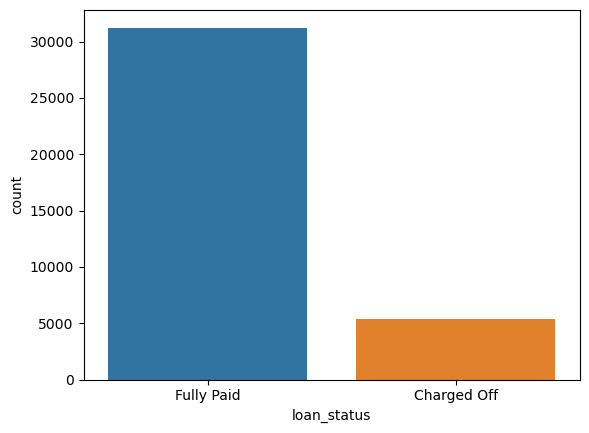

In [254]:
# loan status
sns.countplot(x = 'loan_status', data = df)

defaulted loans are less compared to the fully paid ones.

In [255]:
df.loan_amnt.describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: >

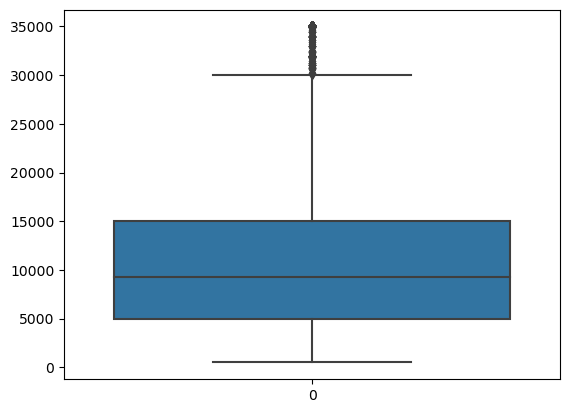

In [256]:
sns.boxplot(df.loan_amnt)

loan amount varies from 500 to 35000 with the mean of 9250.

In [257]:
df.term.value_counts()*100/df.term.count()

36    75.628854
60    24.371146
Name: term, dtype: float64

<Axes: xlabel='term', ylabel='count'>

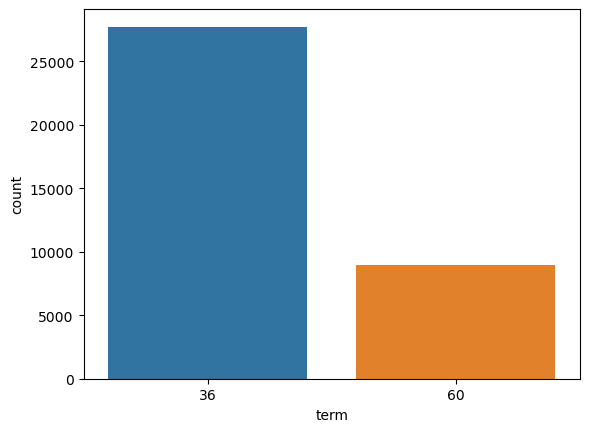

In [277]:
sns.countplot(x = 'term', data = df)

More than half of the loan taken has term of 36 months compared to 60 months.

C:\Users\Dell\AppData\Local\Temp\ipykernel_3388\3358093774.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




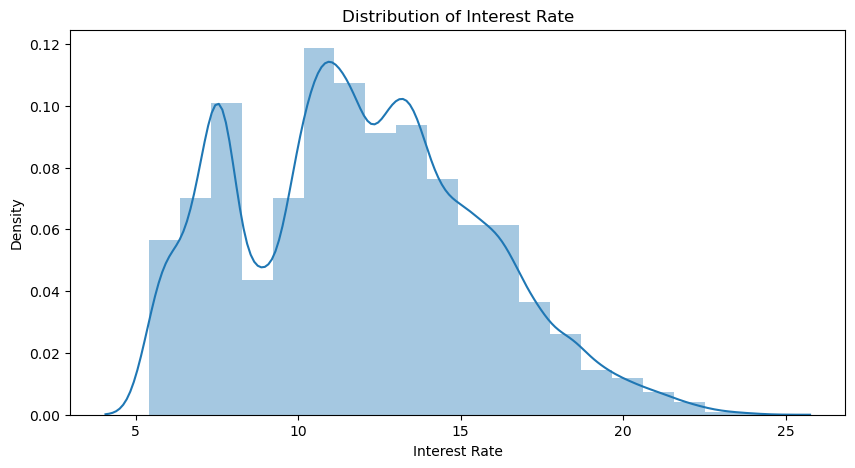

In [292]:
plt.figure(figsize=(10,5))
sns.distplot(sorted(df.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

In [259]:
df.grade.value_counts()

B    11097
A     9646
C     7481
D     4835
E     2448
F      886
G      261
Name: grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

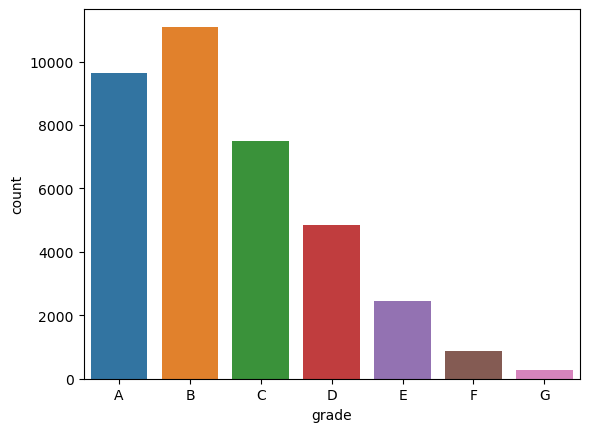

In [260]:
sns.countplot(x = 'grade', data = df)

A large amount of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

<Axes: xlabel='sub_grade', ylabel='count'>

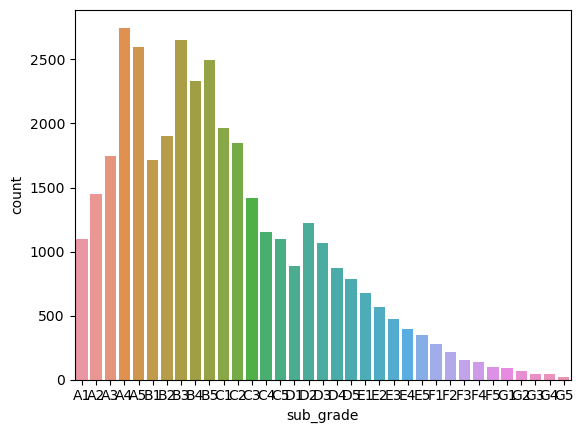

In [261]:
sns.countplot(x = 'sub_grade', data = df)

A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This matches with the Grade distribution.

<Axes: xlabel='emp_length', ylabel='count'>

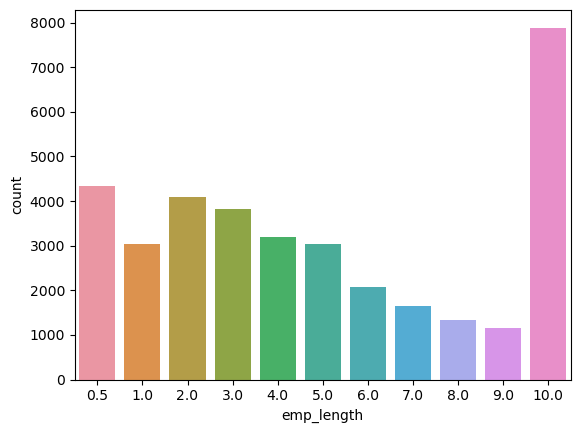

In [262]:
sns.countplot(x = 'emp_length', data = df)

Majority of borrowsers have working experience greater than 10 years.

In [264]:
df.emp_length.value_counts()

10.0    7888
0.5     4327
2.0     4101
3.0     3824
4.0     3200
5.0     3044
1.0     3043
6.0     2073
7.0     1644
8.0     1343
9.0     1153
Name: emp_length, dtype: int64

<Axes: xlabel='home_ownership', ylabel='count'>

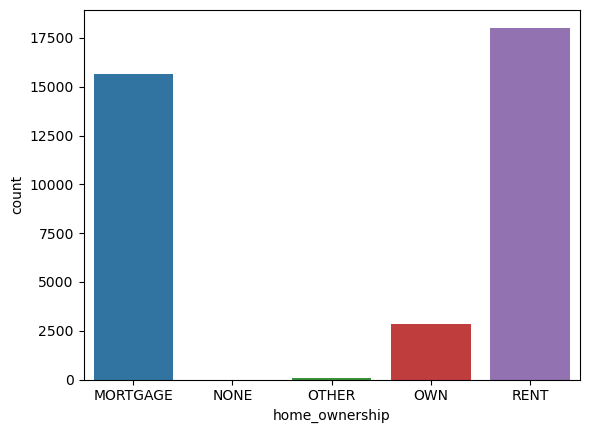

In [265]:
sns.countplot(x = 'home_ownership', data = df)

Majority of borrowsers don't posses property and are on mortage or rent.

<Axes: xlabel='verification_status', ylabel='count'>

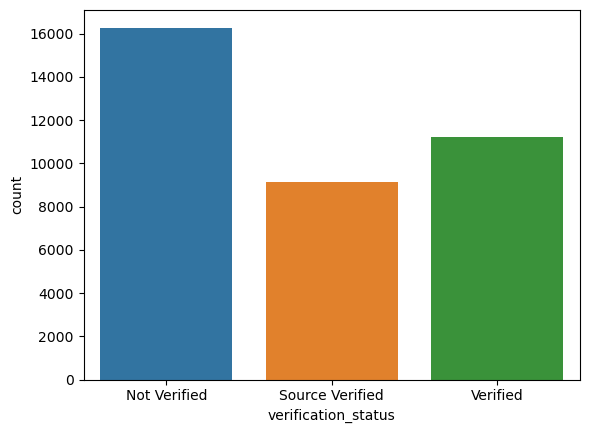

In [266]:
sns.countplot(x = 'verification_status', data = df)

About 50% of the borrowers are verified by the company or have source verified.

C:\Users\Dell\AppData\Local\Temp\ipykernel_3388\2919723458.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




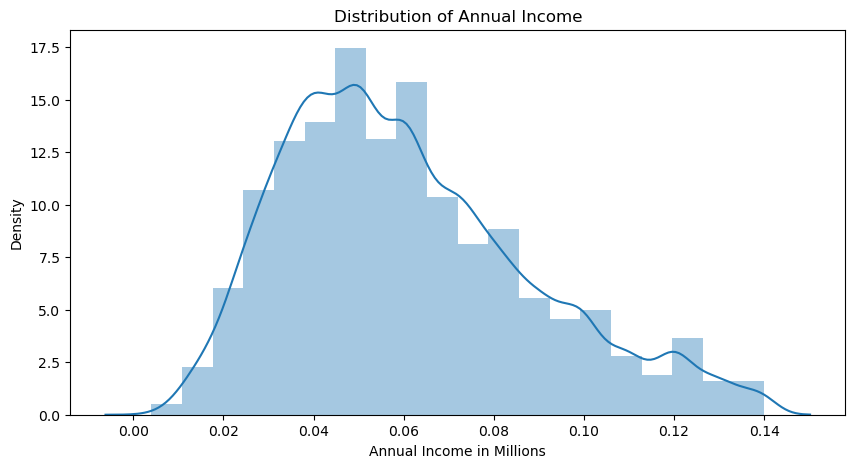

In [267]:
plt.figure(figsize=(10,5))
sns.distplot(df.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.

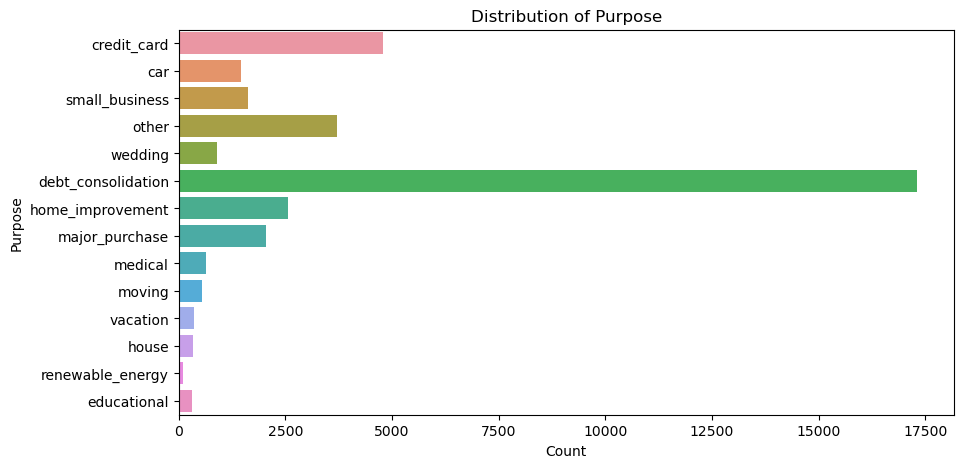

In [268]:
plt.figure(figsize=(10,5))
sns.countplot(y=df.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

A large percentage of loans are taken for debt consolidation followed by credit card.

C:\Users\Dell\AppData\Local\Temp\ipykernel_3388\1890993793.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




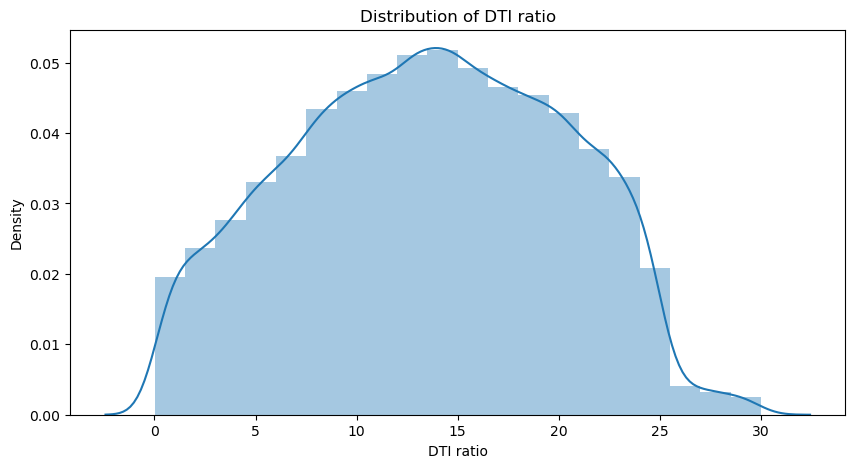

In [269]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(df.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

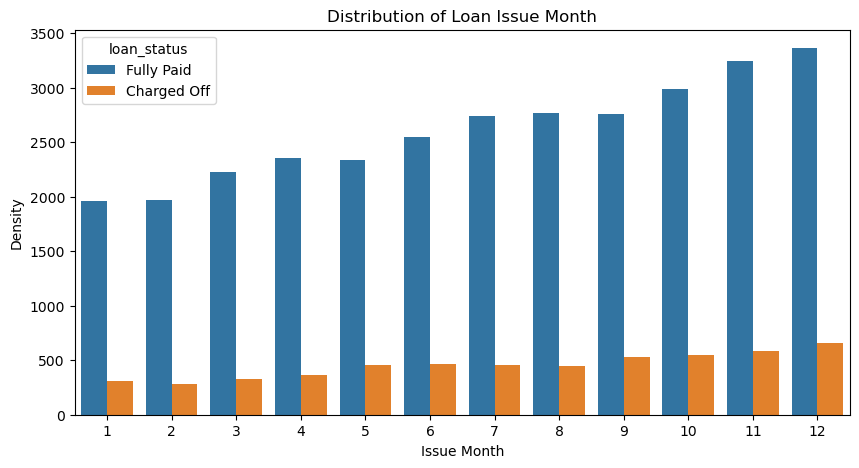

In [271]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(x=df.issue_month,hue=df.loan_status)
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

Majority of the loans are given in last quarter of the year.

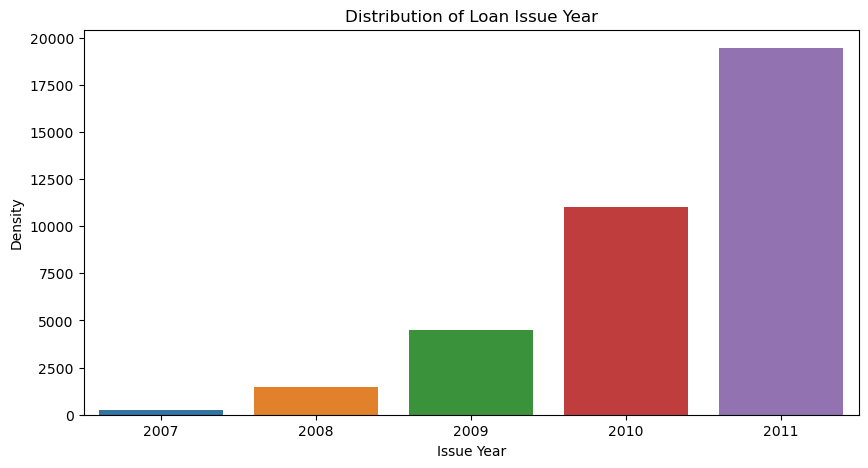

In [276]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(x=df.issue_year)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

In [275]:
df.issue_year.value_counts()

2011    19446
2010    11013
2009     4476
2008     1489
2007      230
Name: issue_year, dtype: int64

In [278]:
df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status', 'annual_inc',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'issue_year', 'issue_month'],
      dtype='object')

### Segmented Univariate Analysis

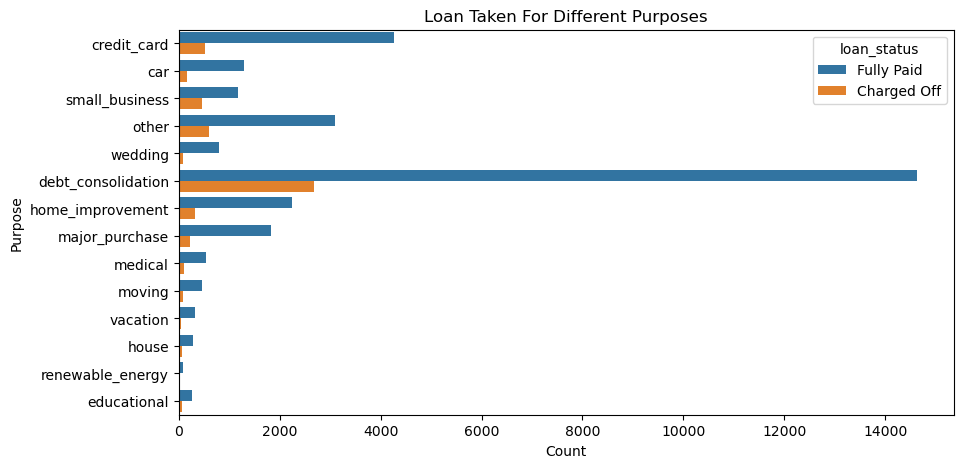

In [279]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

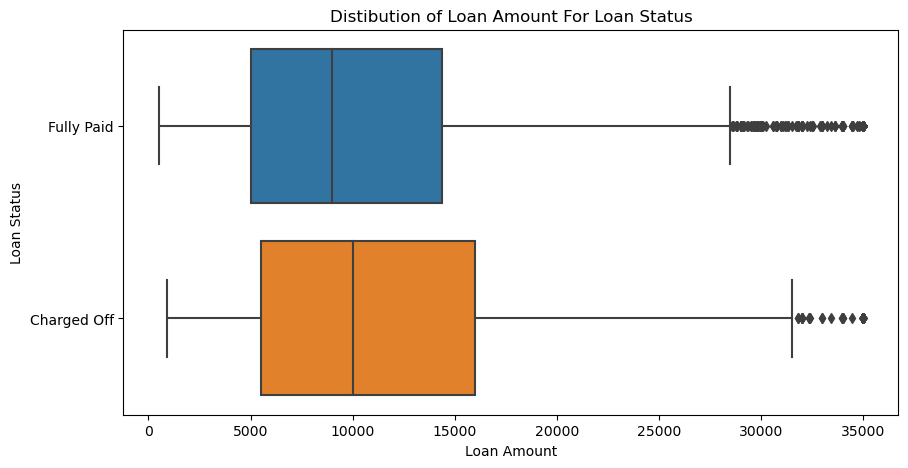

In [280]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

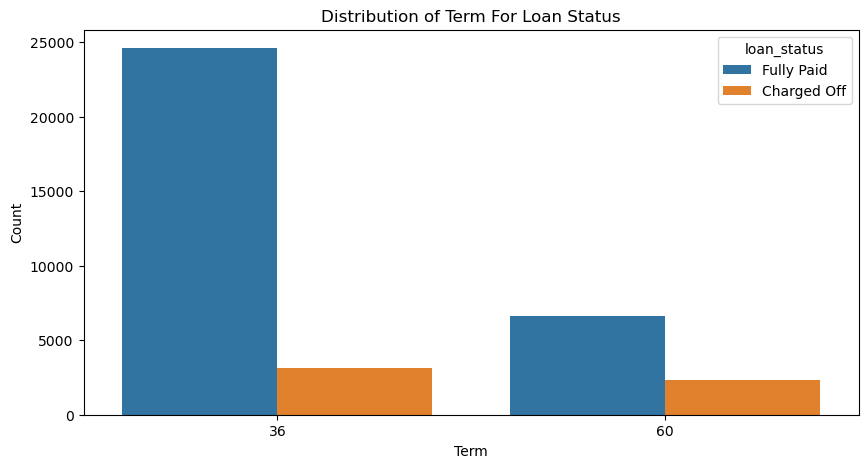

In [281]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

 The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

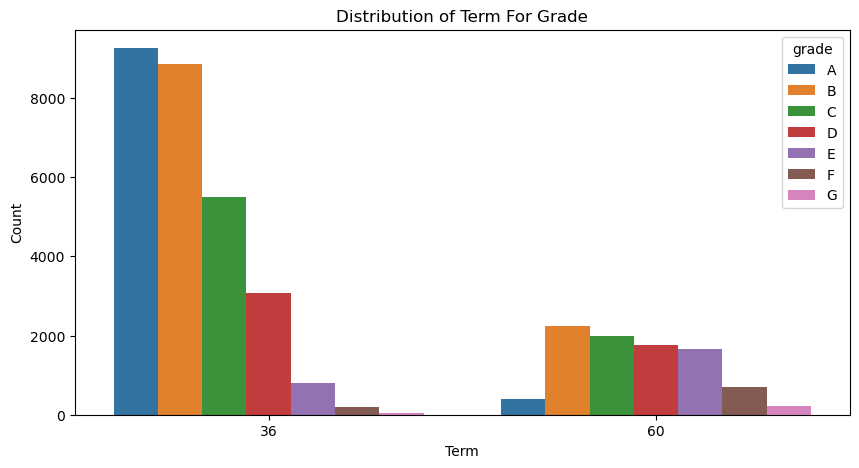

In [282]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

he loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

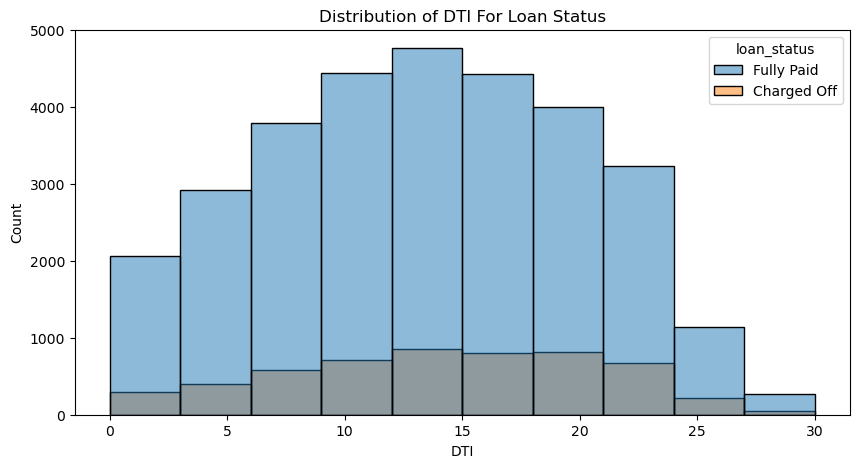

In [283]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

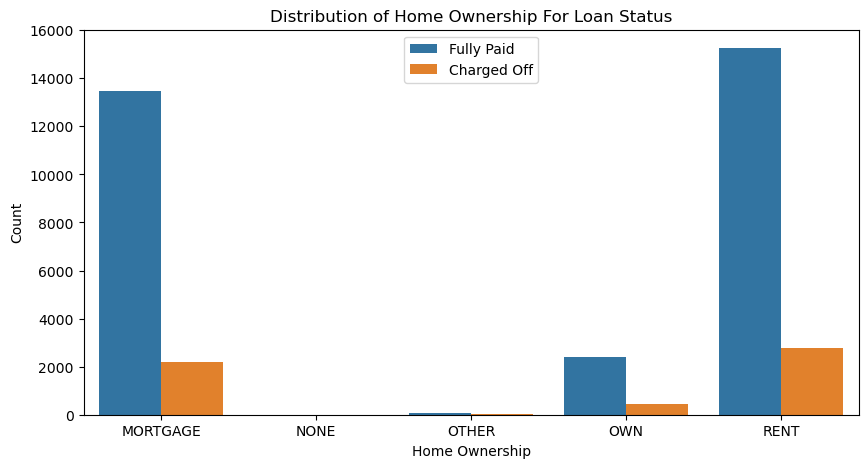

In [284]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

 The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

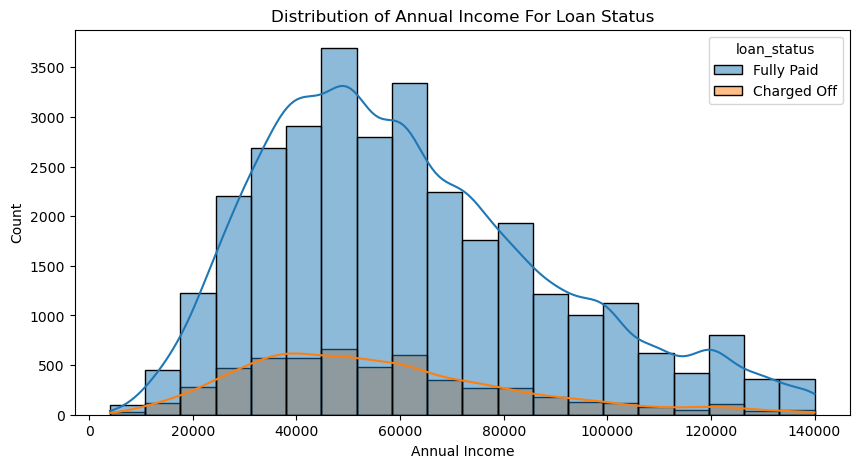

In [285]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

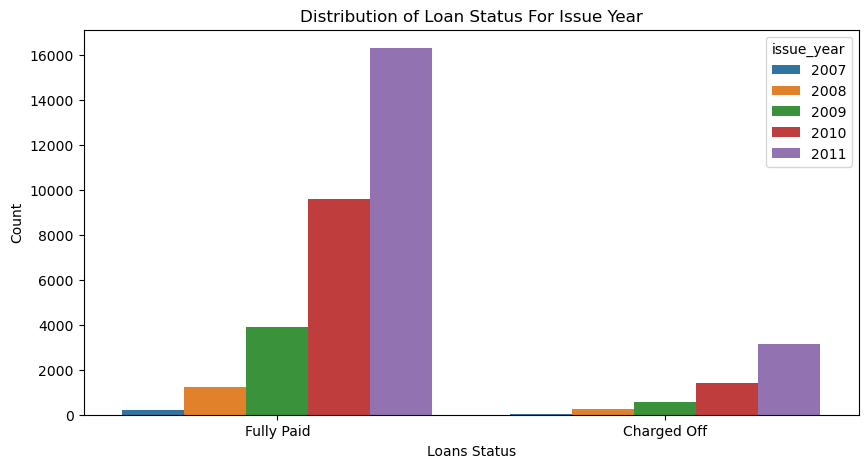

In [286]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

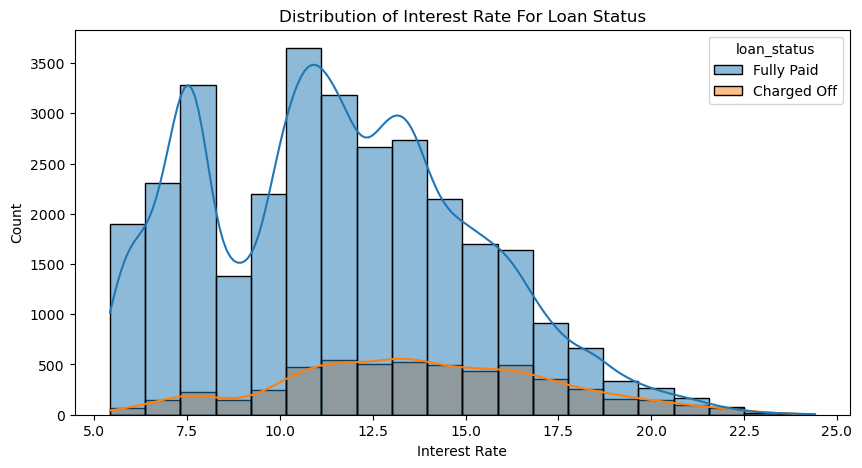

In [287]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

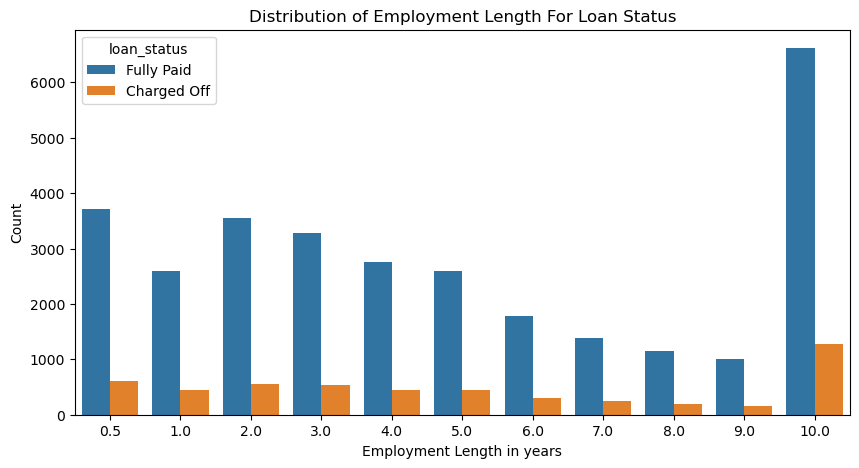

In [288]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

## Bivariate analysis

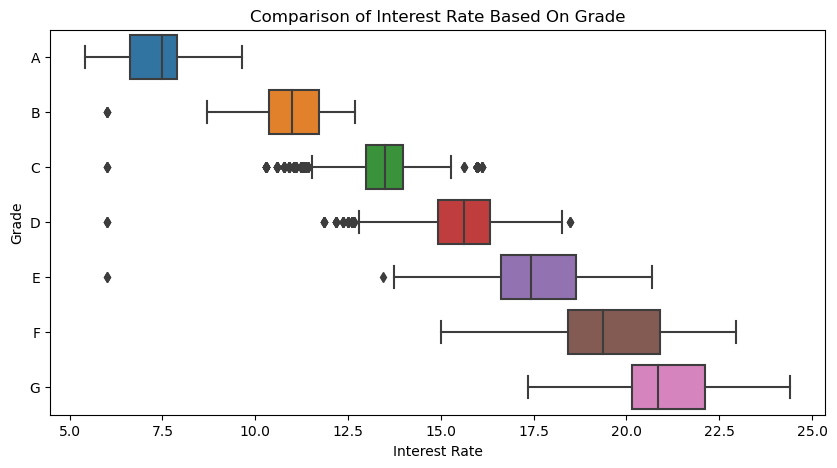

In [289]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

The Grade represent risk factor thus we can say interst rate increases with the risk.

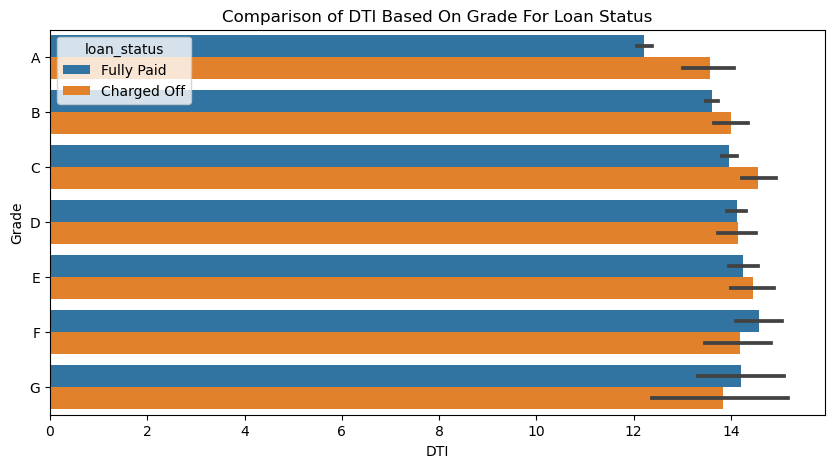

In [290]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

C:\Users\Dell\AppData\Local\Temp\ipykernel_3388\3263808223.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



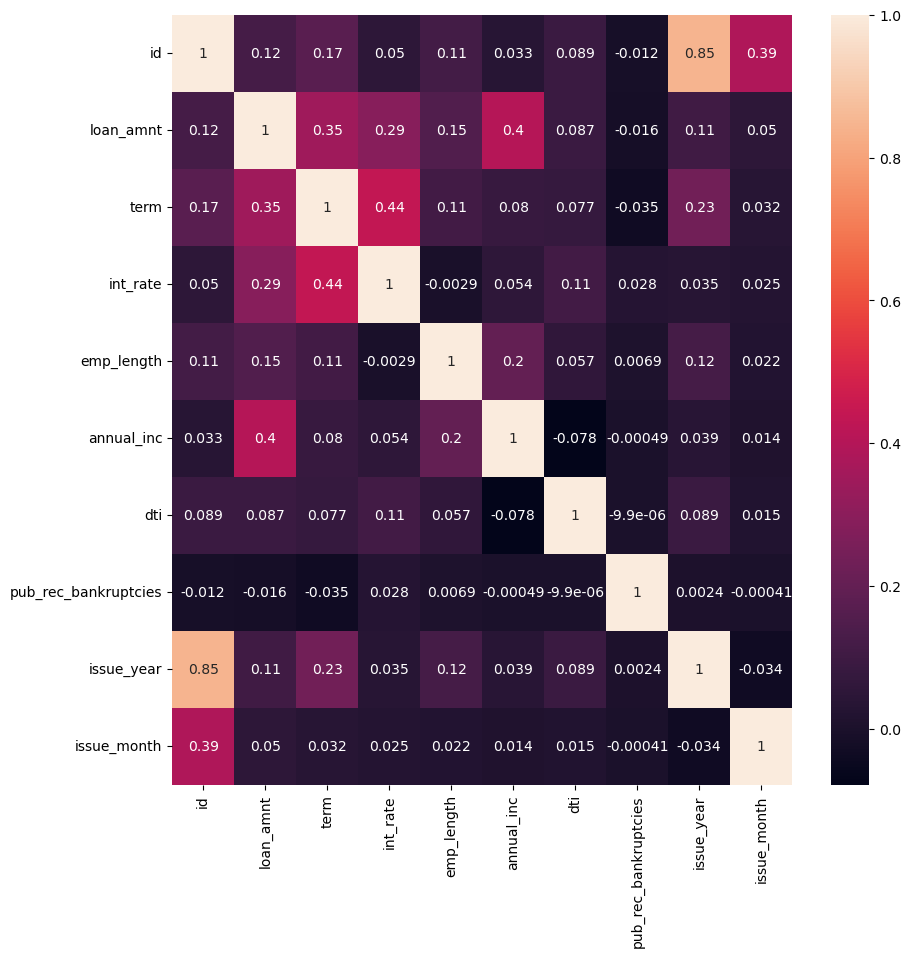

In [291]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

## Insights
### Univariate Analysis
 - The number of defaulted loan is 7 times less than the number of fully paid loan.
 - The majority of loan has a term of 36 months compared to 60 months.
 - The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
 - A large amoutn of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.
 - Majority of borrowsers have working experience greater than 10 years.
 - Majority of borrowsers don't posses property and are on mortage or rent.
 - About 50% of the borrowers are verified by the company or have source verified.
 - Annual Income shows left skewed normal distribution thus we can say that the majorityof burrowers have very low annual income compared to rest.
 - A large percentage of loans are taken for debt consolidation followed by credit card.
 - Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
 - Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
 - Majority of the borrowers have no record of Public Recorded Bankruptcy.
 - Majority of the loans are given in last quarter of the year.
 - The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.
 
 ### Segmented Univariate Analysis
 - Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
 - The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
 - The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
 - The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
 - The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
 - The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
 - Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.
 - The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
 - The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
 - The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis
 - The Grade represent risk factor thus we can say interst rate increases with the risk.
 - The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
 - The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

#### Recommendations
- Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
    1. DTI 
    2. Grades
    3. Verification Status
    4. Annual income
    5. Pub_rec_bankruptcies
- Other considerations for 'defaults' :
    1. Borrowers not from large urban cities like california, new york, texas, florida etc. 
    2. Borrowers having annual income in the range 50000-100000.
    3. Borrowers having Public Recorded Bankruptcy.
    4. Borrowers with least grades like E,F,G which indicates high risk.
    5. Borrowers with very high Debt to Income value.
    6. Borrowers with working experience 10+ years.